In [149]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [150]:
# get raw data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)

In [151]:
# separate into data and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [152]:
print(data.shape, target.shape)

(506, 13) (506,)


In [153]:
# create working copies
X = data.copy()
y = target.copy()

In [154]:
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [155]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

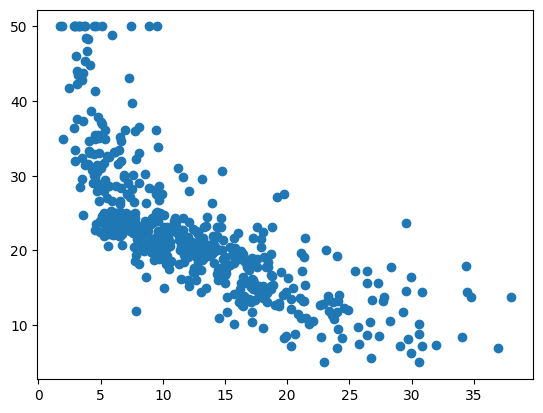

In [156]:
plt.scatter(X.T[12], y)
plt.show()

<AxesSubplot: >

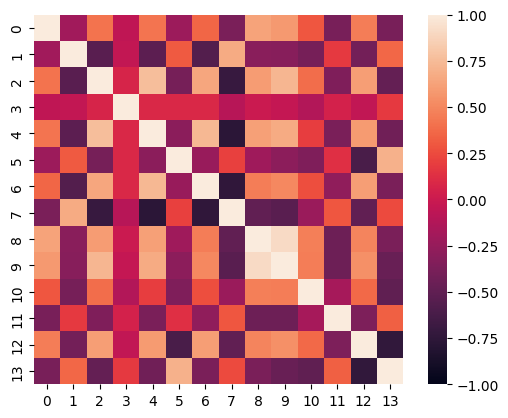

In [157]:
df = pd.DataFrame(data=np.column_stack((X,y)))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True)

In [164]:
# train model
linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = linreg.fit(X_train, y_train)
prediction = model.predict(X_test)

In [176]:
print("r^2 value: ", round(linreg.score(X, y), 2))
print("Coefficients: ", linreg.coef_)
print("Intercept: ", linreg.intercept_)

r^2 value:  0.74
Coefficients:  [-1.27866474e-01  4.28153686e-02 -3.34135193e-02  3.15363932e+00
 -1.85249680e+01  3.98376675e+00 -3.47678444e-03 -1.54843162e+00
  3.11059965e-01 -1.12570342e-02 -9.90165976e-01  9.97068864e-03
 -4.87552210e-01]
Intercept:  36.45664172281489
